# Podobnostni vyhledavani
- pokracovani Tanimotovy podobnosti
- zabudovana funkce v rdkitu: DataStructs
- na zacatku virtualniho screeningu
- pouziti: 
    - hledani v DB: podobne latky -> podobny ucinnek (aktivita)
    - pri synteze: strukturne podobne latky v reakci mohou byt prekurzory
    - tvorba reprezentativnich subsetu ... zvolime subset jako nejlepsi aproximaci -> tyto latky se koupi a otestuji
        - neni nutne testovat latky, ktere se chovaji podobne, ale chceme pokryt cely ten prostor
    

#### Pozn.: 2 typy fingerprintu:
- retezec 0 a 1
- ridke fingerprinty (slovnikovy typ) - set indexu, ktere jsou TRUE (vyhodnejsi, neztracime pamet pamatovanim FALSE hodnot)

In [4]:
from rdkit.Chem import AllChem as Chem 
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys
from rdkit.Chem.Draw import IPythonConsole #aby fungovalo: Draw.DrawMorganBit
from rdkit import DataStructs

In [2]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugbank = [m for m in suppl if m]

RDKit WARNING: [15:07:41]  S group DAT ignored on line 2516
RDKit WARNING: [15:07:41]  S group DAT ignored on line 2516
RDKit WARNING: [15:07:41]  S group DAT ignored on line 2516
RDKit WARNING: [15:07:41]  S group DAT ignored on line 2516
RDKit WARNING: [15:07:41]  S group DAT ignored on line 15552
RDKit WARNING: [15:07:41]  S group DAT ignored on line 15552
RDKit WARNING: [15:07:41]  S group DAT ignored on line 15552
RDKit WARNING: [15:07:41]  S group DAT ignored on line 15552
RDKit ERROR: [15:07:41] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:07:41] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [15:07:41] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [15:07:41] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [15:07:41]  S group GEN ignored on line 102860
RDKit ERROR: [15:07:41] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:07:41]  Unhand

RDKit ERROR: [15:07:43] ERROR: Explicit valence for atom # 8 N, 5, is greater than permitted
RDKit ERROR: [15:07:44] Can't kekulize mol.  Unkekulized atoms: 54 55 56 57 58 59 60 61 62
RDKit ERROR: 
RDKit ERROR: [15:07:44] ERROR: Could not sanitize molecule ending on line 427901
RDKit ERROR: [15:07:44] ERROR: Can't kekulize mol.  Unkekulized atoms: 54 55 56 57 58 59 60 61 62
RDKit ERROR: 
RDKit ERROR: [15:07:44] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [15:07:44] ERROR: Could not sanitize molecule ending on line 432118
RDKit ERROR: [15:07:44] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [15:07:44] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:07:44] ERROR: Could not sanitize molecule ending on line 442989
RDKit ERROR: [15:07:44] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:07:44] Can't kekulize mol.  Unkekulize

RDKit ERROR: [15:07:46] ERROR: Explicit valence for atom # 4 F, 2, is greater than permitted
RDKit ERROR: [15:07:46] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:07:46] ERROR: Could not sanitize molecule ending on line 659994
RDKit ERROR: [15:07:46] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:07:47]  Unhandled CTAB feature: S group SRU on line: 754017. Molecule skipped.
RDKit ERROR: [15:07:49] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [15:07:49] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [15:07:49] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [15:07:50]  Unhandled CTAB feature: S group SRU on line: 1148513. Molecule skipped.
RDKit ERROR: [15:07:50] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [15:07:50] ERROR: Could not sanitize molecule ending on line 1151592


In [3]:
morgan_fps = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugbank]

In [5]:
DataStructs.FingerprintSimilarity(morgan_fps[0],morgan_fps[666])

0.14516129032258066

In [6]:
DataStructs.FingerprintSimilarity(morgan_fps[0],morgan_fps[666],metric=DataStructs.TanimotoSimilarity) 
# => default je Tanimoto

0.14516129032258066

In [8]:
DataStructs.FingerprintSimilarity(morgan_fps[0],morgan_fps[666],metric=DataStructs.DiceSimilarity)

0.2535211267605634

In [9]:
DataStructs.FingerprintSimilarity(morgan_fps[0],morgan_fps[666],metric=DataStructs.McConnaugheySimilarity)

-0.3637042569081404

### Ukol 1: najit 10 nejpodobnejsich latek podle fingerprintu k aspirinu dle Tanimota

In [10]:
#aspirin:
aspirin = Chem.MolFromSmiles("O=C(C)Oc1ccccc1C(=O)O")

In [11]:
aspirin_fp = Chem.GetMorganFingerprintAsBitVect(aspirin, 2, nBits=1024)

In [12]:
similarities_to_aspirin_fp = [DataStructs.FingerprintSimilarity(aspirin_fp, fp, metric=DataStructs.TanimotoSimilarity) 
                              for fp in morgan_fps]

In [13]:
similarities_to_aspirin_fp[:10]

[0.12389380530973451,
 0.10317460317460317,
 0.09259259259259259,
 0.10434782608695652,
 0.05555555555555555,
 0.10101010101010101,
 0.10891089108910891,
 0.11538461538461539,
 0.051470588235294115,
 0.09210526315789473]

In [17]:
similarity_hits = sorted(zip(drugbank, similarities_to_aspirin_fp),key=lambda x: x[1], reverse=True) #pomoci generatoru
similarity_hits[:10]

[(<rdkit.Chem.rdchem.Mol at 0x7f87174bd210>, 1.0),
 (<rdkit.Chem.rdchem.Mol at 0x7f87174c8df0>, 0.6129032258064516),
 (<rdkit.Chem.rdchem.Mol at 0x7f87174b22b0>, 0.5277777777777778),
 (<rdkit.Chem.rdchem.Mol at 0x7f87174dd120>, 0.52),
 (<rdkit.Chem.rdchem.Mol at 0x7f87174beee0>, 0.4642857142857143),
 (<rdkit.Chem.rdchem.Mol at 0x7f87174f2ad0>, 0.43333333333333335),
 (<rdkit.Chem.rdchem.Mol at 0x7f8717474a80>, 0.43333333333333335),
 (<rdkit.Chem.rdchem.Mol at 0x7f87174d7f30>, 0.42424242424242425),
 (<rdkit.Chem.rdchem.Mol at 0x7f87174b57b0>, 0.4166666666666667),
 (<rdkit.Chem.rdchem.Mol at 0x7f87174e88a0>, 0.3888888888888889)]

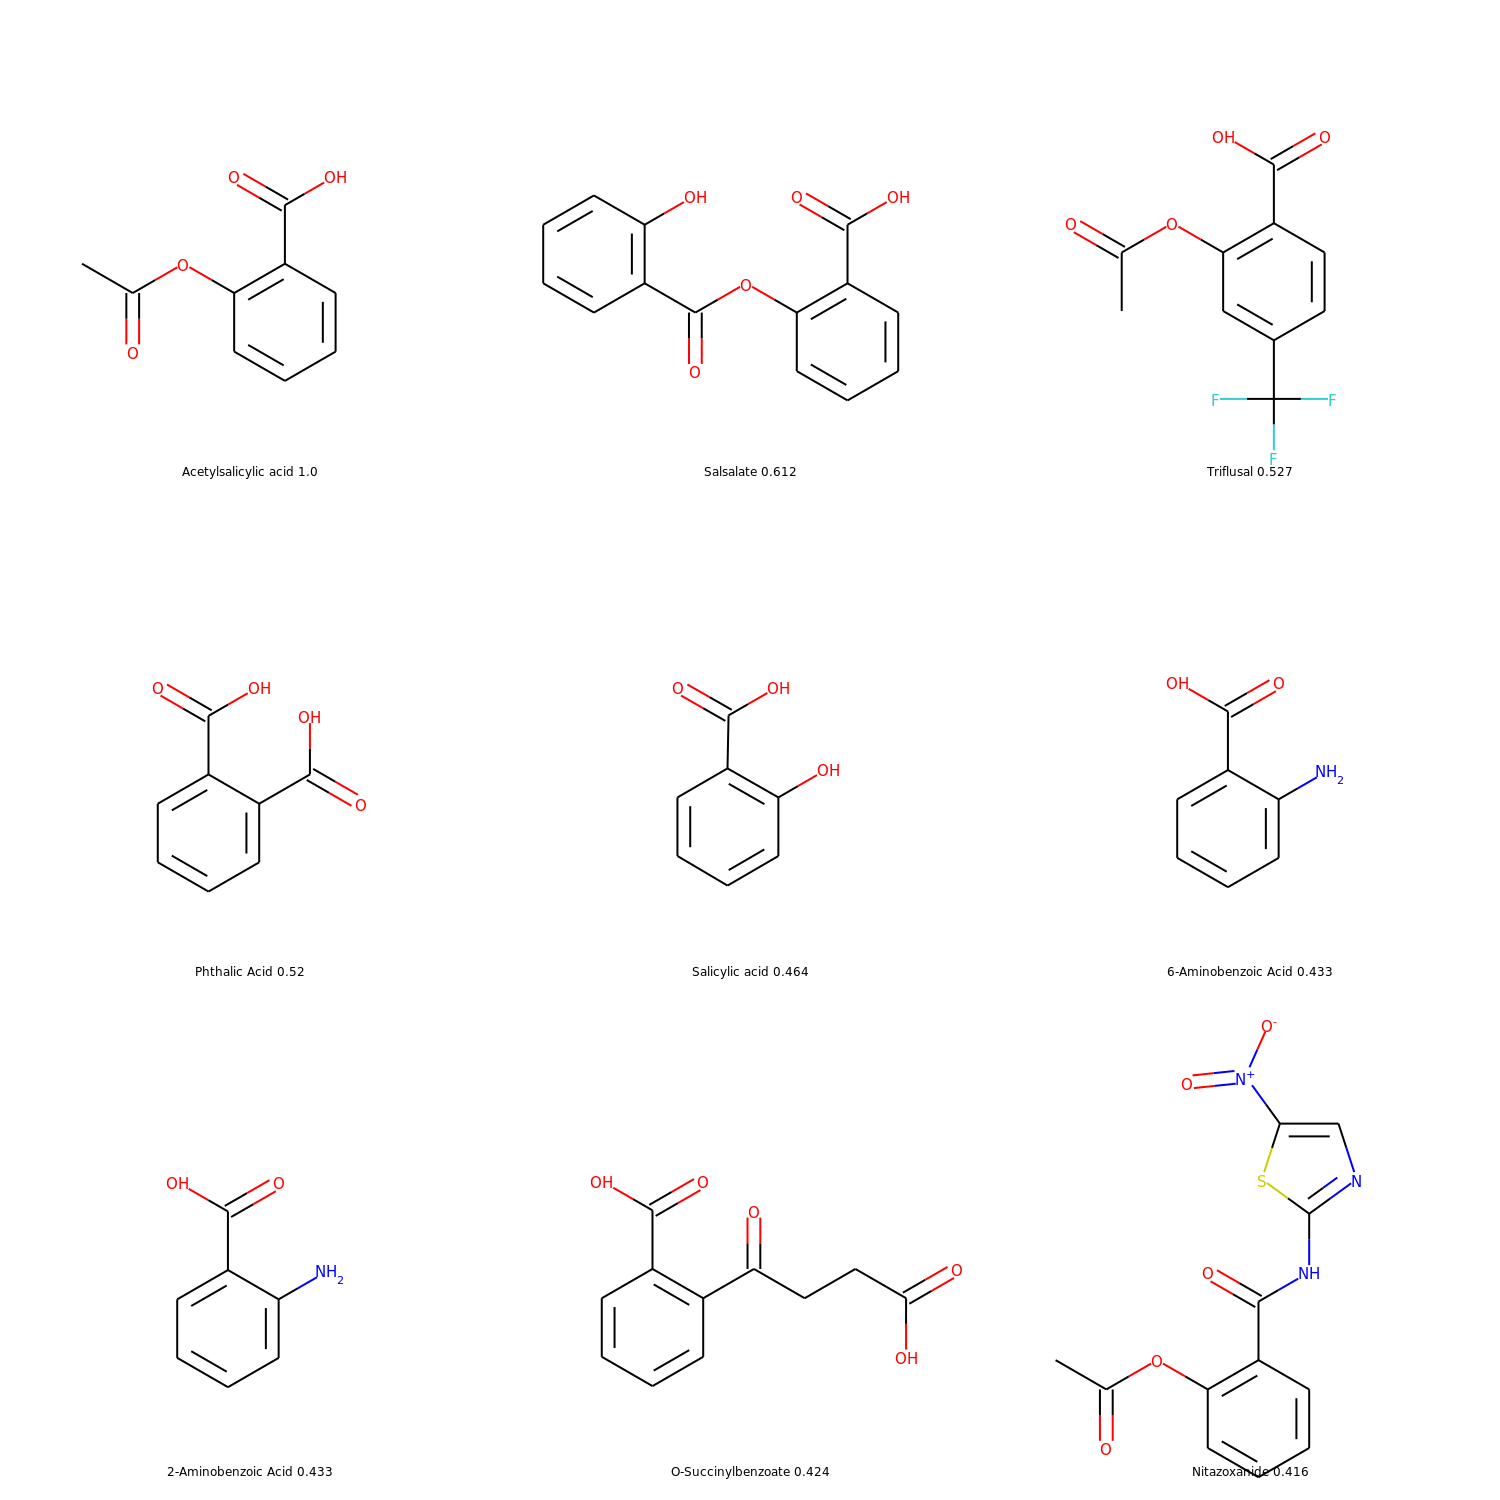

In [27]:
Draw.MolsToGridImage([m[0] for m in similarity_hits[:9]], 
                      molsPerRow=3, 
                      subImgSize=(500, 500), 
                      legends=[m[0].GetProp("GENERIC_NAME")+ ' ' +str(int(m[1]*1000)/1000) for m in similarity_hits[:9]])

### Ukol 2: to same, ale ne morgan, ale maccs keys + porovnat vysledky

In [28]:
drugbank_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugbank]

In [31]:
aspirin_maccs = MACCSkeys.GenMACCSKeys(aspirin)

In [34]:
similarities_to_aspirin_maccs = [DataStructs.FingerprintSimilarity(aspirin_maccs, maccs, metric=DataStructs.TanimotoSimilarity) 
                              for maccs in drugbank_maccs]

In [35]:
similarities_to_aspirin_maccs[:10]

[0.2465753424657534,
 0.2235294117647059,
 0.2191780821917808,
 0.2222222222222222,
 0.2459016393442623,
 0.17647058823529413,
 0.2537313432835821,
 0.4444444444444444,
 0.1935483870967742,
 0.24615384615384617]

In [36]:
similarity_maccs_hits = sorted(zip(drugbank, similarities_to_aspirin_maccs),key=lambda x: x[1], reverse=True) 
similarity_maccs_hits[:10]

[(<rdkit.Chem.rdchem.Mol at 0x7f87174bd210>, 1.0),
 (<rdkit.Chem.rdchem.Mol at 0x7f87174c8df0>, 0.8333333333333334),
 (<rdkit.Chem.rdchem.Mol at 0x7f87174b1b70>, 0.8333333333333334),
 (<rdkit.Chem.rdchem.Mol at 0x7f87174b22b0>, 0.8076923076923077),
 (<rdkit.Chem.rdchem.Mol at 0x7f87174aeda0>, 0.8),
 (<rdkit.Chem.rdchem.Mol at 0x7f87174d1e40>, 0.7916666666666666),
 (<rdkit.Chem.rdchem.Mol at 0x7f87174a8350>, 0.7916666666666666),
 (<rdkit.Chem.rdchem.Mol at 0x7f87174e1b20>, 0.782608695652174),
 (<rdkit.Chem.rdchem.Mol at 0x7f87174aed00>, 0.7692307692307693),
 (<rdkit.Chem.rdchem.Mol at 0x7f871748a3f0>, 0.76)]

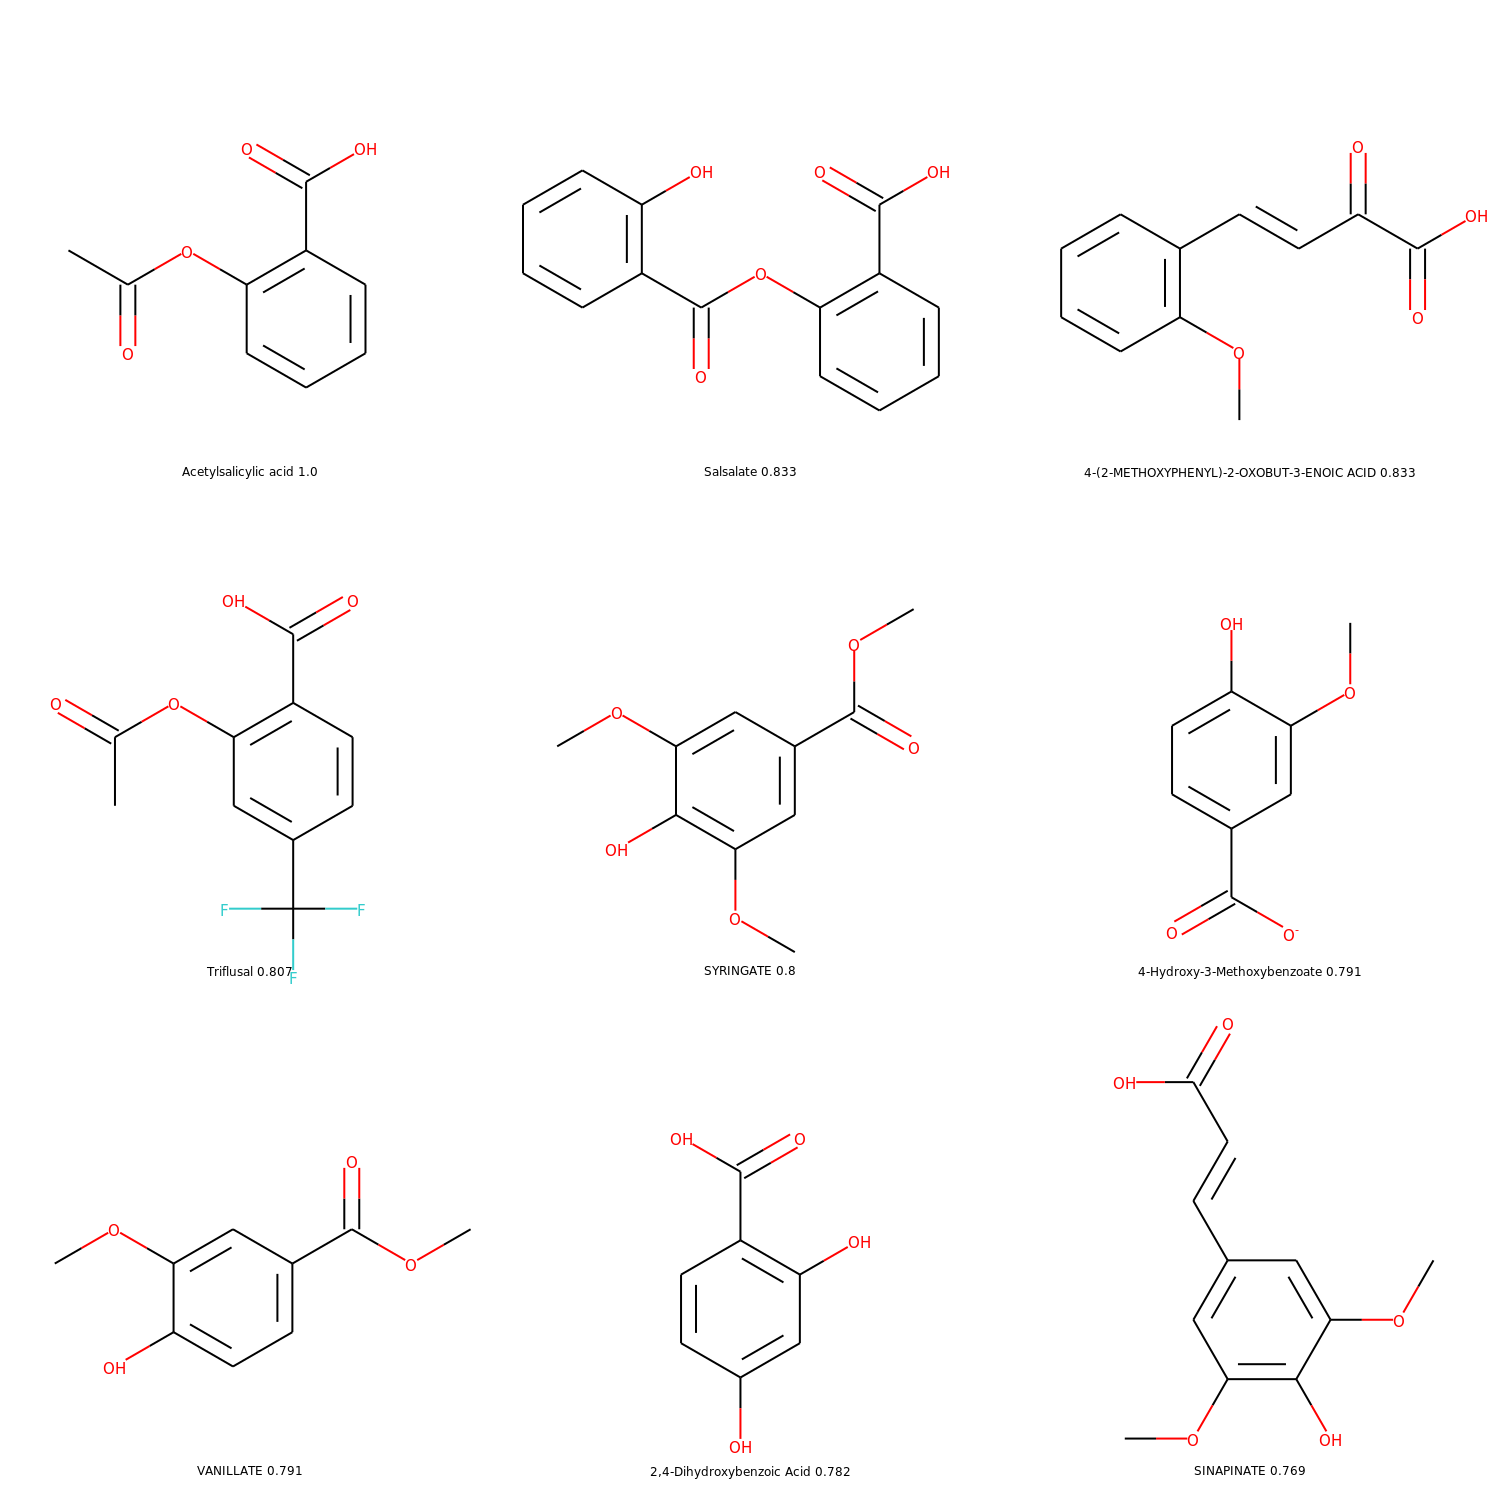

In [37]:
Draw.MolsToGridImage([m[0] for m in similarity_maccs_hits[:9]], 
                      molsPerRow=3, 
                      subImgSize=(500, 500), 
                      legends=[m[0].GetProp("GENERIC_NAME")+ ' ' +str(int(m[1]*1000)/1000) for m in similarity_maccs_hits[:9]])

- distancni matice: kazda struktura proti kazde strukture 
    - neda se to => zjednodusit
    - metody v rdkitu, napr. MaxMinPicker

## Ukol 3: Vyber representativniho subsetu

In [39]:
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

In [41]:
picker = MaxMinPicker() #instance pickeru

In [61]:
#distancni funkce,daji se tomu 2 indexy a ona vraci vzdalenost, ne podobnost
# => 1 - Morgan_similarity
def distance_function(index1, index2, *args, fingerprints=morgan_fps):
    print(index1, index2)
    return 1-DataStructs.FingerprintSimilarity(morgan_fps[index1],
                                               morgan_fps[index2],
                                               metric=DataStructs.TanimotoSimilarity)

In [64]:
picker.LazyPick(distance_function, len(morgan_fps), 20) #na zacatku zvoli referencni strukturu, kolem ktere krouzi
#len(morgan_fps) ... nejvetsi index
#20 ... pocet latek

0 2662
1 2662
2 2662
3 2662
4 2662
5 2662
6 2662
7 2662
8 2662
9 2662
10 2662
11 2662
12 2662
13 2662
14 2662
15 2662
16 2662
17 2662
18 2662
19 2662
20 2662
21 2662
22 2662
23 2662
24 2662
25 2662
26 2662
27 2662
28 2662
29 2662
30 2662
31 2662
32 2662
33 2662
34 2662
35 2662
36 2662
37 2662
38 2662
39 2662
40 2662
41 2662
42 2662
43 2662
44 2662
45 2662
46 2662
47 2662
48 2662
49 2662
50 2662
51 2662
52 2662
53 2662
54 2662
55 2662
56 2662
57 2662
58 2662
59 2662
60 2662
61 2662
62 2662
63 2662
64 2662
65 2662
66 2662
67 2662
68 2662
69 2662
70 2662
71 2662
72 2662
73 2662
74 2662
75 2662
76 2662
77 2662
78 2662
79 2662
80 2662
81 2662
82 2662
83 2662
84 2662
85 2662
86 2662
87 2662
88 2662
89 2662
90 2662
91 2662
92 2662
93 2662
94 2662
95 2662
96 2662
97 2662
98 2662
99 2662
100 2662
101 2662
102 2662
103 2662
104 2662
105 2662
106 2662
107 2662
108 2662
109 2662
110 2662
111 2662
112 2662
113 2662
114 2662
115 2662
116 2662
117 2662
118 2662
119 2662
120 2662
121 2662
122 2662
123

1224 2662
1225 2662
1226 2662
1227 2662
1228 2662
1229 2662
1230 2662
1231 2662
1232 2662
1233 2662
1234 2662
1235 2662
1236 2662
1237 2662
1238 2662
1239 2662
1240 2662
1241 2662
1242 2662
1243 2662
1244 2662
1245 2662
1246 2662
1247 2662
1248 2662
1249 2662
1250 2662
1251 2662
1252 2662
1253 2662
1254 2662
1255 2662
1256 2662
1257 2662
1258 2662
1259 2662
1260 2662
1261 2662
1262 2662
1263 2662
1264 2662
1265 2662
1266 2662
1267 2662
1268 2662
1269 2662
1270 2662
1271 2662
1272 2662
1273 2662
1274 2662
1275 2662
1276 2662
1277 2662
1278 2662
1279 2662
1280 2662
1281 2662
1282 2662
1283 2662
1284 2662
1285 2662
1286 2662
1287 2662
1288 2662
1289 2662
1290 2662
1291 2662
1292 2662
1293 2662
1294 2662
1295 2662
1296 2662
1297 2662
1298 2662
1299 2662
1300 2662
1301 2662
1302 2662
1303 2662
1304 2662
1305 2662
1306 2662
1307 2662
1308 2662
1309 2662
1310 2662
1311 2662
1312 2662
1313 2662
1314 2662
1315 2662
1316 2662
1317 2662
1318 2662
1319 2662
1320 2662
1321 2662
1322 2662
1323 2662


2047 2662
2048 2662
2049 2662
2050 2662
2051 2662
2052 2662
2053 2662
2054 2662
2055 2662
2056 2662
2057 2662
2058 2662
2059 2662
2060 2662
2061 2662
2062 2662
2063 2662
2064 2662
2065 2662
2066 2662
2067 2662
2068 2662
2069 2662
2070 2662
2071 2662
2072 2662
2073 2662
2074 2662
2075 2662
2076 2662
2077 2662
2078 2662
2079 2662
2080 2662
2081 2662
2082 2662
2083 2662
2084 2662
2085 2662
2086 2662
2087 2662
2088 2662
2089 2662
2090 2662
2091 2662
2092 2662
2093 2662
2094 2662
2095 2662
2096 2662
2097 2662
2098 2662
2099 2662
2100 2662
2101 2662
2102 2662
2103 2662
2104 2662
2105 2662
2106 2662
2107 2662
2108 2662
2109 2662
2110 2662
2111 2662
2112 2662
2113 2662
2114 2662
2115 2662
2116 2662
2117 2662
2118 2662
2119 2662
2120 2662
2121 2662
2122 2662
2123 2662
2124 2662
2125 2662
2126 2662
2127 2662
2128 2662
2129 2662
2130 2662
2131 2662
2132 2662
2133 2662
2134 2662
2135 2662
2136 2662
2137 2662
2138 2662
2139 2662
2140 2662
2141 2662
2142 2662
2143 2662
2144 2662
2145 2662
2146 2662


3224 2662
3225 2662
3226 2662
3227 2662
3228 2662
3229 2662
3230 2662
3231 2662
3232 2662
3233 2662
3234 2662
3235 2662
3236 2662
3237 2662
3238 2662
3239 2662
3240 2662
3241 2662
3242 2662
3243 2662
3244 2662
3245 2662
3246 2662
3247 2662
3248 2662
3249 2662
3250 2662
3251 2662
3252 2662
3253 2662
3254 2662
3255 2662
3256 2662
3257 2662
3258 2662
3259 2662
3260 2662
3261 2662
3262 2662
3263 2662
3264 2662
3265 2662
3266 2662
3267 2662
3268 2662
3269 2662
3270 2662
3271 2662
3272 2662
3273 2662
3274 2662
3275 2662
3276 2662
3277 2662
3278 2662
3279 2662
3280 2662
3281 2662
3282 2662
3283 2662
3284 2662
3285 2662
3286 2662
3287 2662
3288 2662
3289 2662
3290 2662
3291 2662
3292 2662
3293 2662
3294 2662
3295 2662
3296 2662
3297 2662
3298 2662
3299 2662
3300 2662
3301 2662
3302 2662
3303 2662
3304 2662
3305 2662
3306 2662
3307 2662
3308 2662
3309 2662
3310 2662
3311 2662
3312 2662
3313 2662
3314 2662
3315 2662
3316 2662
3317 2662
3318 2662
3319 2662
3320 2662
3321 2662
3322 2662
3323 2662


4277 2662
4278 2662
4279 2662
4280 2662
4281 2662
4282 2662
4283 2662
4284 2662
4285 2662
4286 2662
4287 2662
4288 2662
4289 2662
4290 2662
4291 2662
4292 2662
4293 2662
4294 2662
4295 2662
4296 2662
4297 2662
4298 2662
4299 2662
4300 2662
4301 2662
4302 2662
4303 2662
4304 2662
4305 2662
4306 2662
4307 2662
4308 2662
4309 2662
4310 2662
4311 2662
4312 2662
4313 2662
4314 2662
4315 2662
4316 2662
4317 2662
4318 2662
4319 2662
4320 2662
4321 2662
4322 2662
4323 2662
4324 2662
4325 2662
4326 2662
4327 2662
4328 2662
4329 2662
4330 2662
4331 2662
4332 2662
4333 2662
4334 2662
4335 2662
4336 2662
4337 2662
4338 2662
4339 2662
4340 2662
4341 2662
4342 2662
4343 2662
4344 2662
4345 2662
4346 2662
4347 2662
4348 2662
4349 2662
4350 2662
4351 2662
4352 2662
4353 2662
4354 2662
4355 2662
4356 2662
4357 2662
4358 2662
4359 2662
4360 2662
4361 2662
4362 2662
4363 2662
4364 2662
4365 2662
4366 2662
4367 2662
4368 2662
4369 2662
4370 2662
4371 2662
4372 2662
4373 2662
4374 2662
4375 2662
4376 2662


5472 2662
5473 2662
5474 2662
5475 2662
5476 2662
5477 2662
5478 2662
5479 2662
5480 2662
5481 2662
5482 2662
5483 2662
5484 2662
5485 2662
5486 2662
5487 2662
5488 2662
5489 2662
5490 2662
5491 2662
5492 2662
5493 2662
5494 2662
5495 2662
5496 2662
5497 2662
5498 2662
5499 2662
5500 2662
5501 2662
5502 2662
5503 2662
5504 2662
5505 2662
5506 2662
5507 2662
5508 2662
5509 2662
5510 2662
5511 2662
5512 2662
5513 2662
5514 2662
5515 2662
5516 2662
5517 2662
5518 2662
5519 2662
5520 2662
5521 2662
5522 2662
5523 2662
5524 2662
5525 2662
5526 2662
5527 2662
5528 2662
5529 2662
5530 2662
5531 2662
5532 2662
5533 2662
5534 2662
5535 2662
5536 2662
5537 2662
5538 2662
5539 2662
5540 2662
5541 2662
5542 2662
5543 2662
5544 2662
5545 2662
5546 2662
5547 2662
5548 2662
5549 2662
5550 2662
5551 2662
5552 2662
5553 2662
5554 2662
5555 2662
5556 2662
5557 2662
5558 2662
5559 2662
5560 2662
5561 2662
5562 2662
5563 2662
5564 2662
5565 2662
5566 2662
5567 2662
5568 2662
5569 2662
5570 2662
5571 2662


6328 2662
6329 2662
6330 2662
6331 2662
6332 2662
6333 2662
6334 2662
6335 2662
6336 2662
6337 2662
6338 2662
6339 2662
6340 2662
6341 2662
6342 2662
6343 2662
6344 2662
6345 2662
6346 2662
6347 2662
6348 2662
6349 2662
6350 2662
6351 2662
6352 2662
6353 2662
6354 2662
6355 2662
6356 2662
6357 2662
6358 2662
6359 2662
6360 2662
6361 2662
6362 2662
6363 2662
6364 2662
6365 2662
6366 2662
6367 2662
6368 2662
6369 2662
6370 2662
6371 2662
6372 2662
6373 2662
6374 2662
6375 2662
6376 2662
6377 2662
6378 2662
6379 2662
6380 2662
6381 2662
6382 2662
6383 2662
6384 2662
6385 2662
6386 2662
6387 2662
6388 2662
6389 2662
6390 2662
6391 2662
6392 2662
6393 2662
6394 2662
6395 2662
6396 2662
6397 2662
6398 2662
6399 2662
6400 2662
6401 2662
6402 2662
6403 2662
6404 2662
6405 2662
6406 2662
6407 2662
6408 2662
6409 2662
6410 2662
6411 2662
6412 2662
6413 2662
6414 2662
6415 2662
6416 2662
6417 2662
6418 2662
6419 2662
6420 2662
6421 2662
6422 2662
6423 2662
6424 2662
6425 2662
6426 2662
6427 2662


220 215
220 400
260 215
351 1187
423 215
423 400
423 441
423 645
423 1187
669 1187
1197 215
1197 400
1197 441
1197 645
1197 1187
0 1197
16 1197
17 1197
24 1197
33 1197
95 1197
120 1197
351 1197
423 1197
669 1197
1198 215
1198 400
1198 441
1198 645
1198 1187
1198 1197
0 1198
16 1198
17 1198
24 1198
33 1198
95 1198
120 1198
351 1198
423 1198
669 1198
1200 215
1201 215
1201 400
1201 441
1201 645
1201 1187
1201 1197
1201 1198
0 1201
16 1201
17 1201
24 1201
33 1201
95 1201
120 1201
351 1201
423 1201
669 1201
1206 215
1352 215
1362 215
1377 215
1377 400
1377 441
1377 645
1377 1187
1377 1197
1377 1198
1377 1201
0 1377
16 1377
17 1377
24 1377
33 1377
95 1377
120 1377
351 1377
423 1377
669 1377
1378 215
1378 400
1378 441
1378 645
1378 1187
1378 1197
1378 1198
1378 1201
1378 1377
0 1378
16 1378
17 1378
24 1378
33 1378
95 1378
120 1378
351 1378
423 1378
669 1378
1396 215
1458 215
1522 215
1522 400
1522 441
1522 645
1522 1187
1522 1197
1522 1198
1522 1201
1522 1377
1522 1378
1589 215
1589 400
1589

In [67]:
picked = picker.LazyPick(distance_function, len(morgan_fps), 20, seed=666) 

0 4980
1 4980
2 4980
3 4980
4 4980
5 4980
6 4980
7 4980
8 4980
9 4980
10 4980
11 4980
12 4980
13 4980
14 4980
15 4980
16 4980
17 4980
18 4980
19 4980
20 4980
21 4980
22 4980
23 4980
24 4980
25 4980
26 4980
27 4980
28 4980
29 4980
30 4980
31 4980
32 4980
33 4980
34 4980
35 4980
36 4980
37 4980
38 4980
39 4980
40 4980
41 4980
42 4980
43 4980
44 4980
45 4980
46 4980
47 4980
48 4980
49 4980
50 4980
51 4980
52 4980
53 4980
54 4980
55 4980
56 4980
57 4980
58 4980
59 4980
60 4980
61 4980
62 4980
63 4980
64 4980
65 4980
66 4980
67 4980
68 4980
69 4980
70 4980
71 4980
72 4980
73 4980
74 4980
75 4980
76 4980
77 4980
78 4980
79 4980
80 4980
81 4980
82 4980
83 4980
84 4980
85 4980
86 4980
87 4980
88 4980
89 4980
90 4980
91 4980
92 4980
93 4980
94 4980
95 4980
96 4980
97 4980
98 4980
99 4980
100 4980
101 4980
102 4980
103 4980
104 4980
105 4980
106 4980
107 4980
108 4980
109 4980
110 4980
111 4980
112 4980
113 4980
114 4980
115 4980
116 4980
117 4980
118 4980
119 4980
120 4980
121 4980
122 4980
123

1021 4980
1022 4980
1023 4980
1024 4980
1025 4980
1026 4980
1027 4980
1028 4980
1029 4980
1030 4980
1031 4980
1032 4980
1033 4980
1034 4980
1035 4980
1036 4980
1037 4980
1038 4980
1039 4980
1040 4980
1041 4980
1042 4980
1043 4980
1044 4980
1045 4980
1046 4980
1047 4980
1048 4980
1049 4980
1050 4980
1051 4980
1052 4980
1053 4980
1054 4980
1055 4980
1056 4980
1057 4980
1058 4980
1059 4980
1060 4980
1061 4980
1062 4980
1063 4980
1064 4980
1065 4980
1066 4980
1067 4980
1068 4980
1069 4980
1070 4980
1071 4980
1072 4980
1073 4980
1074 4980
1075 4980
1076 4980
1077 4980
1078 4980
1079 4980
1080 4980
1081 4980
1082 4980
1083 4980
1084 4980
1085 4980
1086 4980
1087 4980
1088 4980
1089 4980
1090 4980
1091 4980
1092 4980
1093 4980
1094 4980
1095 4980
1096 4980
1097 4980
1098 4980
1099 4980
1100 4980
1101 4980
1102 4980
1103 4980
1104 4980
1105 4980
1106 4980
1107 4980
1108 4980
1109 4980
1110 4980
1111 4980
1112 4980
1113 4980
1114 4980
1115 4980
1116 4980
1117 4980
1118 4980
1119 4980
1120 4980


2020 4980
2021 4980
2022 4980
2023 4980
2024 4980
2025 4980
2026 4980
2027 4980
2028 4980
2029 4980
2030 4980
2031 4980
2032 4980
2033 4980
2034 4980
2035 4980
2036 4980
2037 4980
2038 4980
2039 4980
2040 4980
2041 4980
2042 4980
2043 4980
2044 4980
2045 4980
2046 4980
2047 4980
2048 4980
2049 4980
2050 4980
2051 4980
2052 4980
2053 4980
2054 4980
2055 4980
2056 4980
2057 4980
2058 4980
2059 4980
2060 4980
2061 4980
2062 4980
2063 4980
2064 4980
2065 4980
2066 4980
2067 4980
2068 4980
2069 4980
2070 4980
2071 4980
2072 4980
2073 4980
2074 4980
2075 4980
2076 4980
2077 4980
2078 4980
2079 4980
2080 4980
2081 4980
2082 4980
2083 4980
2084 4980
2085 4980
2086 4980
2087 4980
2088 4980
2089 4980
2090 4980
2091 4980
2092 4980
2093 4980
2094 4980
2095 4980
2096 4980
2097 4980
2098 4980
2099 4980
2100 4980
2101 4980
2102 4980
2103 4980
2104 4980
2105 4980
2106 4980
2107 4980
2108 4980
2109 4980
2110 4980
2111 4980
2112 4980
2113 4980
2114 4980
2115 4980
2116 4980
2117 4980
2118 4980
2119 4980


3019 4980
3020 4980
3021 4980
3022 4980
3023 4980
3024 4980
3025 4980
3026 4980
3027 4980
3028 4980
3029 4980
3030 4980
3031 4980
3032 4980
3033 4980
3034 4980
3035 4980
3036 4980
3037 4980
3038 4980
3039 4980
3040 4980
3041 4980
3042 4980
3043 4980
3044 4980
3045 4980
3046 4980
3047 4980
3048 4980
3049 4980
3050 4980
3051 4980
3052 4980
3053 4980
3054 4980
3055 4980
3056 4980
3057 4980
3058 4980
3059 4980
3060 4980
3061 4980
3062 4980
3063 4980
3064 4980
3065 4980
3066 4980
3067 4980
3068 4980
3069 4980
3070 4980
3071 4980
3072 4980
3073 4980
3074 4980
3075 4980
3076 4980
3077 4980
3078 4980
3079 4980
3080 4980
3081 4980
3082 4980
3083 4980
3084 4980
3085 4980
3086 4980
3087 4980
3088 4980
3089 4980
3090 4980
3091 4980
3092 4980
3093 4980
3094 4980
3095 4980
3096 4980
3097 4980
3098 4980
3099 4980
3100 4980
3101 4980
3102 4980
3103 4980
3104 4980
3105 4980
3106 4980
3107 4980
3108 4980
3109 4980
3110 4980
3111 4980
3112 4980
3113 4980
3114 4980
3115 4980
3116 4980
3117 4980
3118 4980


4018 4980
4019 4980
4020 4980
4021 4980
4022 4980
4023 4980
4024 4980
4025 4980
4026 4980
4027 4980
4028 4980
4029 4980
4030 4980
4031 4980
4032 4980
4033 4980
4034 4980
4035 4980
4036 4980
4037 4980
4038 4980
4039 4980
4040 4980
4041 4980
4042 4980
4043 4980
4044 4980
4045 4980
4046 4980
4047 4980
4048 4980
4049 4980
4050 4980
4051 4980
4052 4980
4053 4980
4054 4980
4055 4980
4056 4980
4057 4980
4058 4980
4059 4980
4060 4980
4061 4980
4062 4980
4063 4980
4064 4980
4065 4980
4066 4980
4067 4980
4068 4980
4069 4980
4070 4980
4071 4980
4072 4980
4073 4980
4074 4980
4075 4980
4076 4980
4077 4980
4078 4980
4079 4980
4080 4980
4081 4980
4082 4980
4083 4980
4084 4980
4085 4980
4086 4980
4087 4980
4088 4980
4089 4980
4090 4980
4091 4980
4092 4980
4093 4980
4094 4980
4095 4980
4096 4980
4097 4980
4098 4980
4099 4980
4100 4980
4101 4980
4102 4980
4103 4980
4104 4980
4105 4980
4106 4980
4107 4980
4108 4980
4109 4980
4110 4980
4111 4980
4112 4980
4113 4980
4114 4980
4115 4980
4116 4980
4117 4980


5018 4980
5019 4980
5020 4980
5021 4980
5022 4980
5023 4980
5024 4980
5025 4980
5026 4980
5027 4980
5028 4980
5029 4980
5030 4980
5031 4980
5032 4980
5033 4980
5034 4980
5035 4980
5036 4980
5037 4980
5038 4980
5039 4980
5040 4980
5041 4980
5042 4980
5043 4980
5044 4980
5045 4980
5046 4980
5047 4980
5048 4980
5049 4980
5050 4980
5051 4980
5052 4980
5053 4980
5054 4980
5055 4980
5056 4980
5057 4980
5058 4980
5059 4980
5060 4980
5061 4980
5062 4980
5063 4980
5064 4980
5065 4980
5066 4980
5067 4980
5068 4980
5069 4980
5070 4980
5071 4980
5072 4980
5073 4980
5074 4980
5075 4980
5076 4980
5077 4980
5078 4980
5079 4980
5080 4980
5081 4980
5082 4980
5083 4980
5084 4980
5085 4980
5086 4980
5087 4980
5088 4980
5089 4980
5090 4980
5091 4980
5092 4980
5093 4980
5094 4980
5095 4980
5096 4980
5097 4980
5098 4980
5099 4980
5100 4980
5101 4980
5102 4980
5103 4980
5104 4980
5105 4980
5106 4980
5107 4980
5108 4980
5109 4980
5110 4980
5111 4980
5112 4980
5113 4980
5114 4980
5115 4980
5116 4980
5117 4980


5871 4980
5872 4980
5873 4980
5874 4980
5875 4980
5876 4980
5877 4980
5878 4980
5879 4980
5880 4980
5881 4980
5882 4980
5883 4980
5884 4980
5885 4980
5886 4980
5887 4980
5888 4980
5889 4980
5890 4980
5891 4980
5892 4980
5893 4980
5894 4980
5895 4980
5896 4980
5897 4980
5898 4980
5899 4980
5900 4980
5901 4980
5902 4980
5903 4980
5904 4980
5905 4980
5906 4980
5907 4980
5908 4980
5909 4980
5910 4980
5911 4980
5912 4980
5913 4980
5914 4980
5915 4980
5916 4980
5917 4980
5918 4980
5919 4980
5920 4980
5921 4980
5922 4980
5923 4980
5924 4980
5925 4980
5926 4980
5927 4980
5928 4980
5929 4980
5930 4980
5931 4980
5932 4980
5933 4980
5934 4980
5935 4980
5936 4980
5937 4980
5938 4980
5939 4980
5940 4980
5941 4980
5942 4980
5943 4980
5944 4980
5945 4980
5946 4980
5947 4980
5948 4980
5949 4980
5950 4980
5951 4980
5952 4980
5953 4980
5954 4980
5955 4980
5956 4980
5957 4980
5958 4980
5959 4980
5960 4980
5961 4980
5962 4980
5963 4980
5964 4980
5965 4980
5966 4980
5967 4980
5968 4980
5969 4980
5970 4980


6766 4980
6767 4980
6768 4980
6769 4980
6770 4980
6771 4980
6772 4980
6773 4980
6774 4980
6775 4980
6776 4980
6777 4980
6778 4980
6779 4980
6780 4980
6781 4980
6782 4980
6783 4980
6784 4980
6785 4980
6786 4980
6787 4980
6788 4980
6789 4980
6790 4980
6791 4980
6792 4980
6793 4980
6794 4980
6795 4980
6796 4980
6797 4980
6798 4980
6799 4980
6800 4980
6801 4980
6802 4980
6803 4980
6804 4980
6805 4980
6806 4980
6807 4980
6808 4980
6809 4980
6810 4980
6811 4980
6812 4980
6813 4980
6814 4980
6815 4980
6816 4980
6817 4980
6818 4980
6819 4980
6820 4980
6821 4980
6822 4980
6823 4980
6824 4980
6825 4980
6826 4980
6827 4980
6828 4980
6829 4980
6830 4980
6831 4980
6832 4980
6833 4980
6834 4980
6835 4980
6836 4980
6837 4980
6838 4980
6839 4980
6840 4980
6841 4980
6842 4980
6843 4980
6844 4980
6845 4980
6846 4980
6847 4980
6848 4980
6849 4980
6850 4980
6851 4980
6852 4980
6853 4980
6854 4980
6855 4980
6856 4980
6857 4980
6858 4980
6859 4980
6860 4980
6861 4980
6862 4980
6863 4980
6864 4980
6865 4980


4605 849
4605 1187
4605 1197
4605 1198
4605 1201
4605 1377
4605 1378
4605 2115
4605 2608
4605 2693
4605 2732
4605 2769
4611 19
4611 318
4611 645
4611 849
4611 1187
4611 1197
4611 1198
4611 1201
4611 1377
4611 1378
4611 2115
4620 19
4628 19
4629 19
4629 318
4629 645
4633 19
4633 318
4633 645
4633 849
4633 1187
4633 1197
4633 1198
4633 1201
4633 1377
4633 1378
4633 2115
4633 2608
4633 2693
4633 2732
4633 2769
4633 2782
4633 3946
0 4633
3 4633
4 4633
8 4633
28 4633
45 4633
60 4633
90 4633
98 4633
1321 4633
2124 4633
4659 19
4659 318
4659 645
4659 849
4659 1187
4659 1197
4659 1198
4659 1201
4659 1377
4659 1378
4659 2115
4659 2608
4659 2693
4659 2732
4659 2769
4659 2782
4659 3946
4659 4633


In [68]:
list(picked) #seznam vybranych

[4980,
 19,
 318,
 645,
 849,
 1187,
 1197,
 1198,
 1201,
 1377,
 1378,
 2115,
 2608,
 2693,
 2732,
 2769,
 2782,
 3946,
 4633,
 4659]

In [78]:
picked_molekules = [drugbank[i] for i in picked]
len(picked_molekules)

20

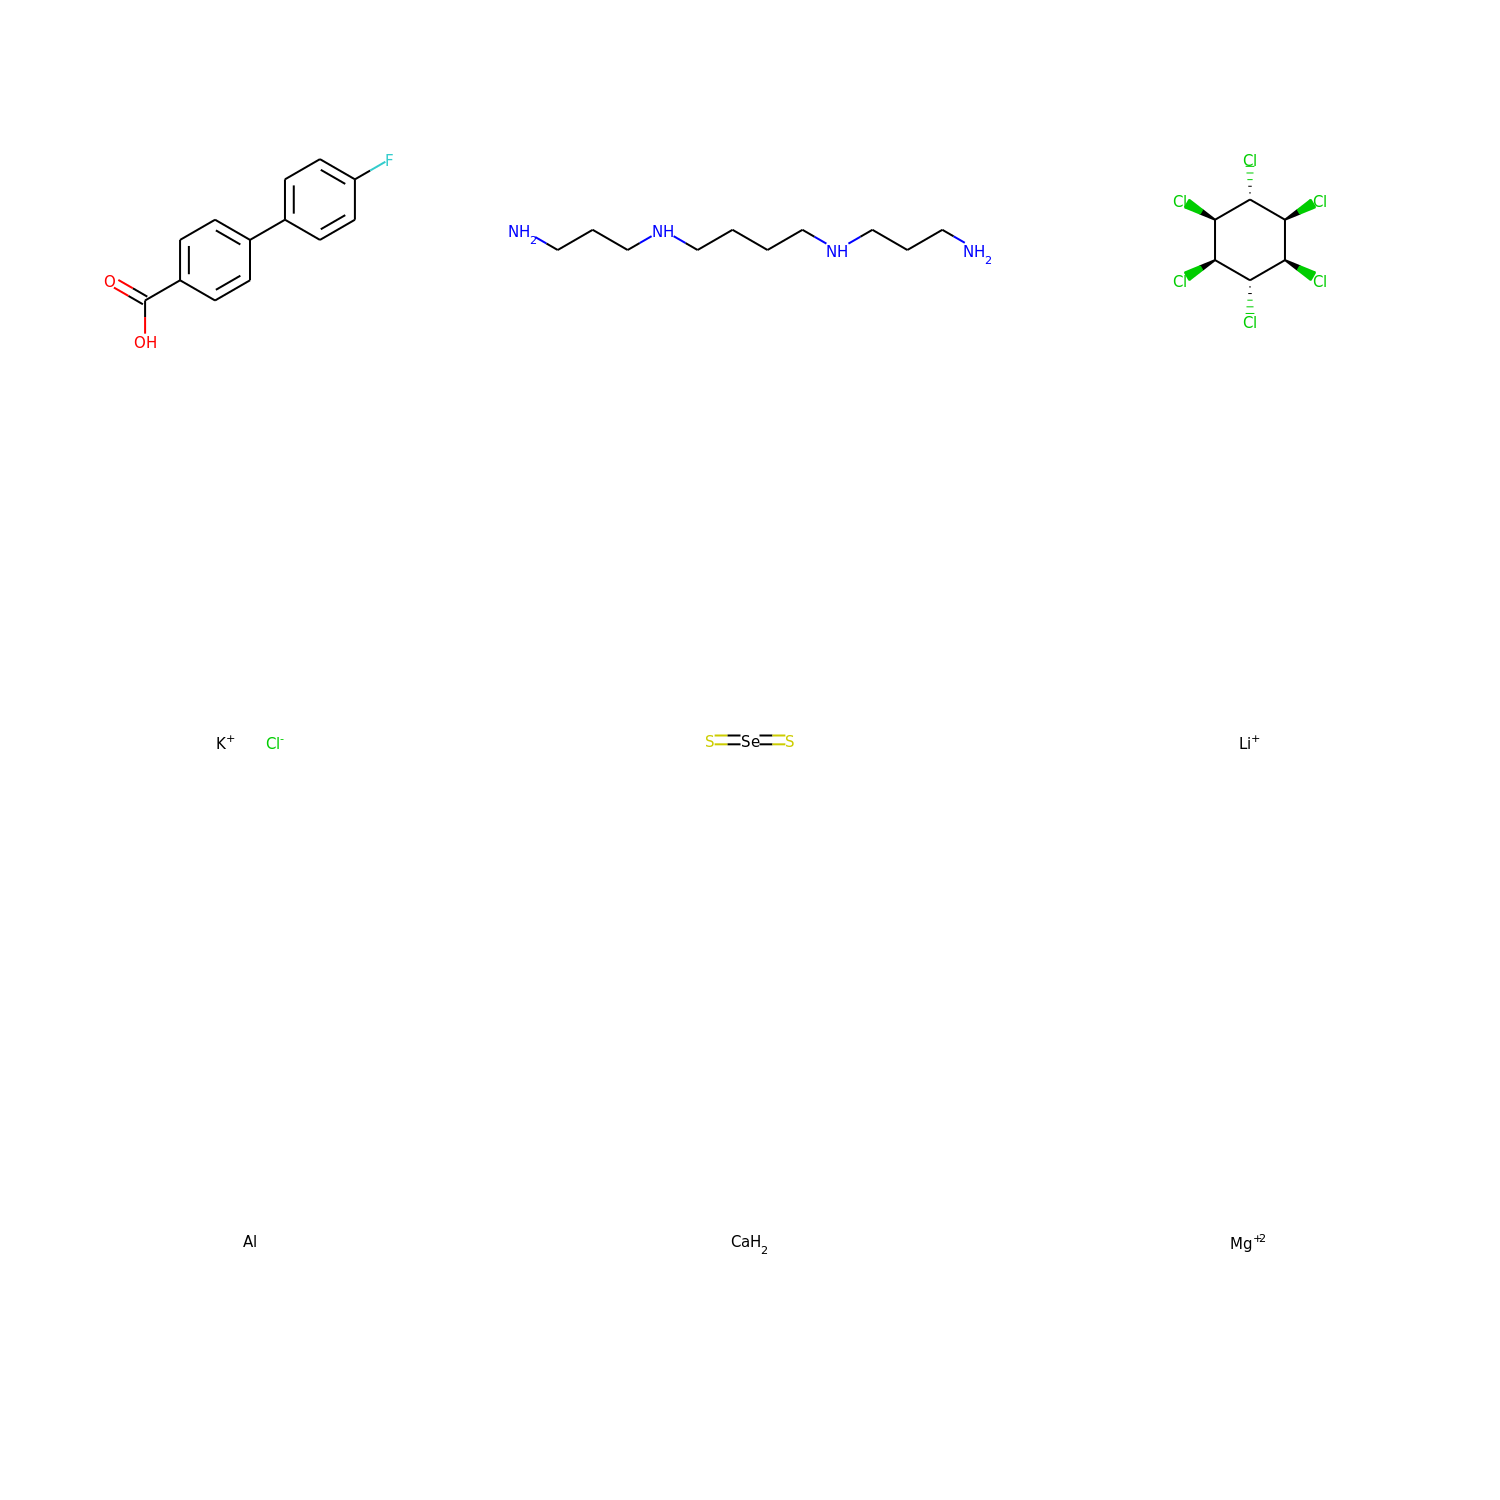

In [85]:
Draw.MolsToGridImage(picked_molekules[:9], molsPerRow=3, 
                      subImgSize=(500, 500))

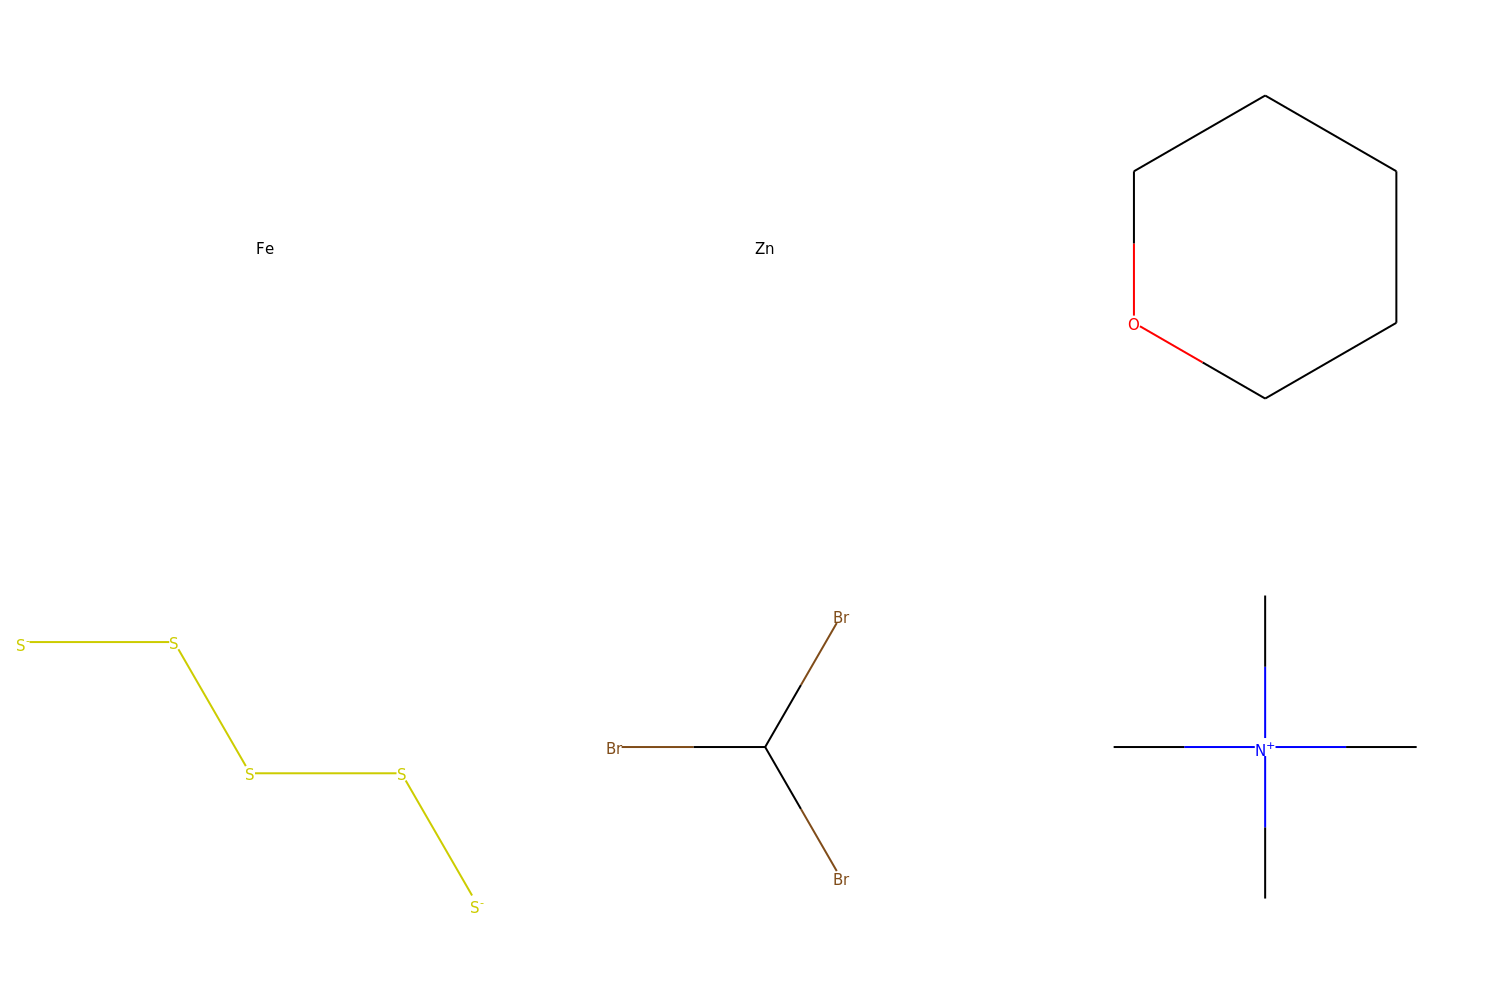

In [86]:
Draw.MolsToGridImage(picked_molekules[9:15], molsPerRow=3, 
                      subImgSize=(500, 500))

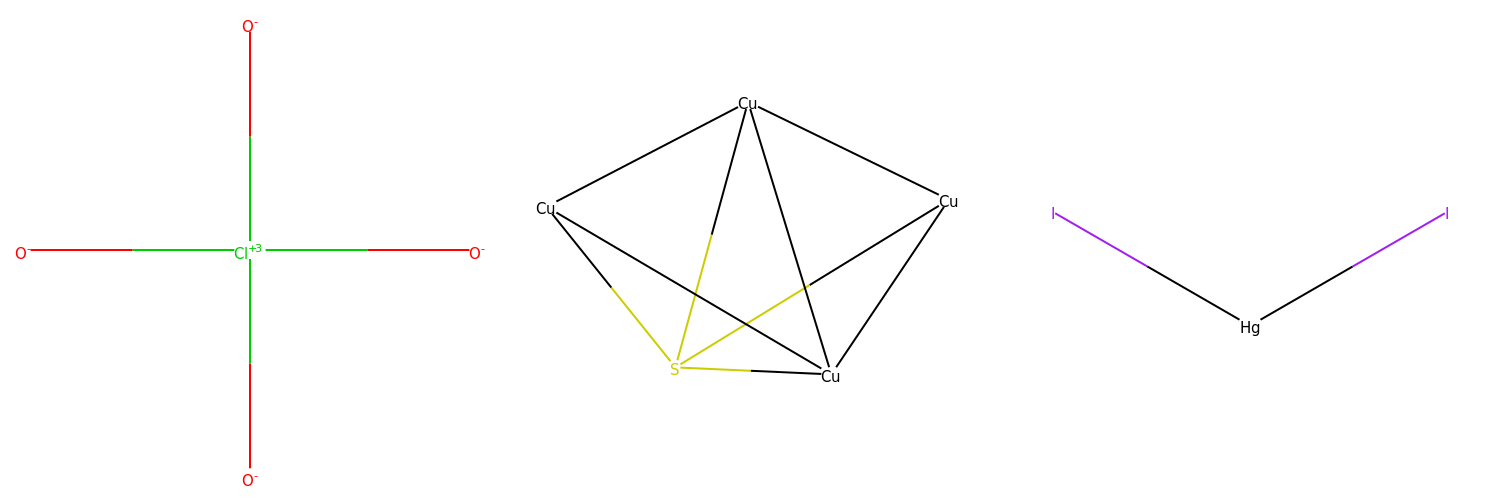

In [91]:
Draw.MolsToGridImage(picked_molekules[15:18], molsPerRow=3, 
                      subImgSize=(500, 500))

### Ukol 4: To same, ale s odstranenim struktur, ktere neobsahuji ani 1 uhlik:

In [98]:
carbon = Chem.MolFromSmarts('[#6]') #aromaticky i neorganicky uhlik

In [99]:
organic_drugbank = [m for m in drugbank if m.HasSubstructMatch(carbon)]
len(organic_drugbank)

7031

In [100]:
morgan_organic_fp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in organic_drugbank]

In [101]:
organic_picker = MaxMinPicker()

In [103]:
def org_distance_function(index1, index2, *args, fingerprints=morgan_organic_fp):
    print(index1, index2)
    return 1-DataStructs.FingerprintSimilarity(morgan_organic_fp[index1],
                                               morgan_organic_fp[index2],
                                               metric=DataStructs.TanimotoSimilarity)

In [104]:
organic_picked = list(picker.LazyPick(distance_function, len(morgan_fps), 20, seed=666) )

0 4980
1 4980
2 4980
3 4980
4 4980
5 4980
6 4980
7 4980
8 4980
9 4980
10 4980
11 4980
12 4980
13 4980
14 4980
15 4980
16 4980
17 4980
18 4980
19 4980
20 4980
21 4980
22 4980
23 4980
24 4980
25 4980
26 4980
27 4980
28 4980
29 4980
30 4980
31 4980
32 4980
33 4980
34 4980
35 4980
36 4980
37 4980
38 4980
39 4980
40 4980
41 4980
42 4980
43 4980
44 4980
45 4980
46 4980
47 4980
48 4980
49 4980
50 4980
51 4980
52 4980
53 4980
54 4980
55 4980
56 4980
57 4980
58 4980
59 4980
60 4980
61 4980
62 4980
63 4980
64 4980
65 4980
66 4980
67 4980
68 4980
69 4980
70 4980
71 4980
72 4980
73 4980
74 4980
75 4980
76 4980
77 4980
78 4980
79 4980
80 4980
81 4980
82 4980
83 4980
84 4980
85 4980
86 4980
87 4980
88 4980
89 4980
90 4980
91 4980
92 4980
93 4980
94 4980
95 4980
96 4980
97 4980
98 4980
99 4980
100 4980
101 4980
102 4980
103 4980
104 4980
105 4980
106 4980
107 4980
108 4980
109 4980
110 4980
111 4980
112 4980
113 4980
114 4980
115 4980
116 4980
117 4980
118 4980
119 4980
120 4980
121 4980
122 4980
123

1133 4980
1134 4980
1135 4980
1136 4980
1137 4980
1138 4980
1139 4980
1140 4980
1141 4980
1142 4980
1143 4980
1144 4980
1145 4980
1146 4980
1147 4980
1148 4980
1149 4980
1150 4980
1151 4980
1152 4980
1153 4980
1154 4980
1155 4980
1156 4980
1157 4980
1158 4980
1159 4980
1160 4980
1161 4980
1162 4980
1163 4980
1164 4980
1165 4980
1166 4980
1167 4980
1168 4980
1169 4980
1170 4980
1171 4980
1172 4980
1173 4980
1174 4980
1175 4980
1176 4980
1177 4980
1178 4980
1179 4980
1180 4980
1181 4980
1182 4980
1183 4980
1184 4980
1185 4980
1186 4980
1187 4980
1188 4980
1189 4980
1190 4980
1191 4980
1192 4980
1193 4980
1194 4980
1195 4980
1196 4980
1197 4980
1198 4980
1199 4980
1200 4980
1201 4980
1202 4980
1203 4980
1204 4980
1205 4980
1206 4980
1207 4980
1208 4980
1209 4980
1210 4980
1211 4980
1212 4980
1213 4980
1214 4980
1215 4980
1216 4980
1217 4980
1218 4980
1219 4980
1220 4980
1221 4980
1222 4980
1223 4980
1224 4980
1225 4980
1226 4980
1227 4980
1228 4980
1229 4980
1230 4980
1231 4980
1232 4980


1956 4980
1957 4980
1958 4980
1959 4980
1960 4980
1961 4980
1962 4980
1963 4980
1964 4980
1965 4980
1966 4980
1967 4980
1968 4980
1969 4980
1970 4980
1971 4980
1972 4980
1973 4980
1974 4980
1975 4980
1976 4980
1977 4980
1978 4980
1979 4980
1980 4980
1981 4980
1982 4980
1983 4980
1984 4980
1985 4980
1986 4980
1987 4980
1988 4980
1989 4980
1990 4980
1991 4980
1992 4980
1993 4980
1994 4980
1995 4980
1996 4980
1997 4980
1998 4980
1999 4980
2000 4980
2001 4980
2002 4980
2003 4980
2004 4980
2005 4980
2006 4980
2007 4980
2008 4980
2009 4980
2010 4980
2011 4980
2012 4980
2013 4980
2014 4980
2015 4980
2016 4980
2017 4980
2018 4980
2019 4980
2020 4980
2021 4980
2022 4980
2023 4980
2024 4980
2025 4980
2026 4980
2027 4980
2028 4980
2029 4980
2030 4980
2031 4980
2032 4980
2033 4980
2034 4980
2035 4980
2036 4980
2037 4980
2038 4980
2039 4980
2040 4980
2041 4980
2042 4980
2043 4980
2044 4980
2045 4980
2046 4980
2047 4980
2048 4980
2049 4980
2050 4980
2051 4980
2052 4980
2053 4980
2054 4980
2055 4980


2903 4980
2904 4980
2905 4980
2906 4980
2907 4980
2908 4980
2909 4980
2910 4980
2911 4980
2912 4980
2913 4980
2914 4980
2915 4980
2916 4980
2917 4980
2918 4980
2919 4980
2920 4980
2921 4980
2922 4980
2923 4980
2924 4980
2925 4980
2926 4980
2927 4980
2928 4980
2929 4980
2930 4980
2931 4980
2932 4980
2933 4980
2934 4980
2935 4980
2936 4980
2937 4980
2938 4980
2939 4980
2940 4980
2941 4980
2942 4980
2943 4980
2944 4980
2945 4980
2946 4980
2947 4980
2948 4980
2949 4980
2950 4980
2951 4980
2952 4980
2953 4980
2954 4980
2955 4980
2956 4980
2957 4980
2958 4980
2959 4980
2960 4980
2961 4980
2962 4980
2963 4980
2964 4980
2965 4980
2966 4980
2967 4980
2968 4980
2969 4980
2970 4980
2971 4980
2972 4980
2973 4980
2974 4980
2975 4980
2976 4980
2977 4980
2978 4980
2979 4980
2980 4980
2981 4980
2982 4980
2983 4980
2984 4980
2985 4980
2986 4980
2987 4980
2988 4980
2989 4980
2990 4980
2991 4980
2992 4980
2993 4980
2994 4980
2995 4980
2996 4980
2997 4980
2998 4980
2999 4980
3000 4980
3001 4980
3002 4980


4150 4980
4151 4980
4152 4980
4153 4980
4154 4980
4155 4980
4156 4980
4157 4980
4158 4980
4159 4980
4160 4980
4161 4980
4162 4980
4163 4980
4164 4980
4165 4980
4166 4980
4167 4980
4168 4980
4169 4980
4170 4980
4171 4980
4172 4980
4173 4980
4174 4980
4175 4980
4176 4980
4177 4980
4178 4980
4179 4980
4180 4980
4181 4980
4182 4980
4183 4980
4184 4980
4185 4980
4186 4980
4187 4980
4188 4980
4189 4980
4190 4980
4191 4980
4192 4980
4193 4980
4194 4980
4195 4980
4196 4980
4197 4980
4198 4980
4199 4980
4200 4980
4201 4980
4202 4980
4203 4980
4204 4980
4205 4980
4206 4980
4207 4980
4208 4980
4209 4980
4210 4980
4211 4980
4212 4980
4213 4980
4214 4980
4215 4980
4216 4980
4217 4980
4218 4980
4219 4980
4220 4980
4221 4980
4222 4980
4223 4980
4224 4980
4225 4980
4226 4980
4227 4980
4228 4980
4229 4980
4230 4980
4231 4980
4232 4980
4233 4980
4234 4980
4235 4980
4236 4980
4237 4980
4238 4980
4239 4980
4240 4980
4241 4980
4242 4980
4243 4980
4244 4980
4245 4980
4246 4980
4247 4980
4248 4980
4249 4980


5454 4980
5455 4980
5456 4980
5457 4980
5458 4980
5459 4980
5460 4980
5461 4980
5462 4980
5463 4980
5464 4980
5465 4980
5466 4980
5467 4980
5468 4980
5469 4980
5470 4980
5471 4980
5472 4980
5473 4980
5474 4980
5475 4980
5476 4980
5477 4980
5478 4980
5479 4980
5480 4980
5481 4980
5482 4980
5483 4980
5484 4980
5485 4980
5486 4980
5487 4980
5488 4980
5489 4980
5490 4980
5491 4980
5492 4980
5493 4980
5494 4980
5495 4980
5496 4980
5497 4980
5498 4980
5499 4980
5500 4980
5501 4980
5502 4980
5503 4980
5504 4980
5505 4980
5506 4980
5507 4980
5508 4980
5509 4980
5510 4980
5511 4980
5512 4980
5513 4980
5514 4980
5515 4980
5516 4980
5517 4980
5518 4980
5519 4980
5520 4980
5521 4980
5522 4980
5523 4980
5524 4980
5525 4980
5526 4980
5527 4980
5528 4980
5529 4980
5530 4980
5531 4980
5532 4980
5533 4980
5534 4980
5535 4980
5536 4980
5537 4980
5538 4980
5539 4980
5540 4980
5541 4980
5542 4980
5543 4980
5544 4980
5545 4980
5546 4980
5547 4980
5548 4980
5549 4980
5550 4980
5551 4980
5552 4980
5553 4980


6454 4980
6455 4980
6456 4980
6457 4980
6458 4980
6459 4980
6460 4980
6461 4980
6462 4980
6463 4980
6464 4980
6465 4980
6466 4980
6467 4980
6468 4980
6469 4980
6470 4980
6471 4980
6472 4980
6473 4980
6474 4980
6475 4980
6476 4980
6477 4980
6478 4980
6479 4980
6480 4980
6481 4980
6482 4980
6483 4980
6484 4980
6485 4980
6486 4980
6487 4980
6488 4980
6489 4980
6490 4980
6491 4980
6492 4980
6493 4980
6494 4980
6495 4980
6496 4980
6497 4980
6498 4980
6499 4980
6500 4980
6501 4980
6502 4980
6503 4980
6504 4980
6505 4980
6506 4980
6507 4980
6508 4980
6509 4980
6510 4980
6511 4980
6512 4980
6513 4980
6514 4980
6515 4980
6516 4980
6517 4980
6518 4980
6519 4980
6520 4980
6521 4980
6522 4980
6523 4980
6524 4980
6525 4980
6526 4980
6527 4980
6528 4980
6529 4980
6530 4980
6531 4980
6532 4980
6533 4980
6534 4980
6535 4980
6536 4980
6537 4980
6538 4980
6539 4980
6540 4980
6541 4980
6542 4980
6543 4980
6544 4980
6545 4980
6546 4980
6547 4980
6548 4980
6549 4980
6550 4980
6551 4980
6552 4980
6553 4980


1246 318
1246 645
1246 849
1246 1187
1246 1197
1246 1198
1246 1201
1246 1377
1246 1378
1246 2115
1321 645
1321 849
1321 1187
1321 1197
1321 1198
1321 1201
1321 1377
1321 1378
1321 2115
1321 2608
2084 19
2124 645
2124 849
2124 1187
2124 1197
2124 1198
2124 1201
2124 1377
2124 1378
2124 2115
2124 2608
2364 2608
2376 19
2405 19
2407 19
2418 19
2418 318
2455 19
2515 19
2515 318
2533 19
2580 19
2580 318
2629 19
2644 19
2644 318
2671 19
2693 19
2693 318
2693 645
2693 849
2693 1187
2693 1197
2693 1198
2693 1201
2693 1377
2693 1378
2693 2115
2693 2608
0 2693
3 2693
4 2693
8 2693
15 2693
28 2693
45 2693
60 2693
90 2693
98 2693
1321 2693
1425 318
1683 19
1724 318
1834 318
1875 19
2102 19
2107 19
2124 2693
2699 19
2732 19
2732 318
2732 645
2732 849
2732 1187
2732 1197
2732 1198
2732 1201
2732 1377
2732 1378
2732 2115
2732 2608
2732 2693
0 2732
3 2732
4 2732
8 2732
15 2732
28 2732
45 2732
60 2732
90 2732
98 2732
1321 2732
2124 2732
2733 19
2762 19
2769 19
2769 318
2769 645
2769 849
2769 1187
2769 

In [109]:
organic_picked_molecules = [organic_drugbank[i] for i in organic_picked]
len(organic_picked_molecules)

20

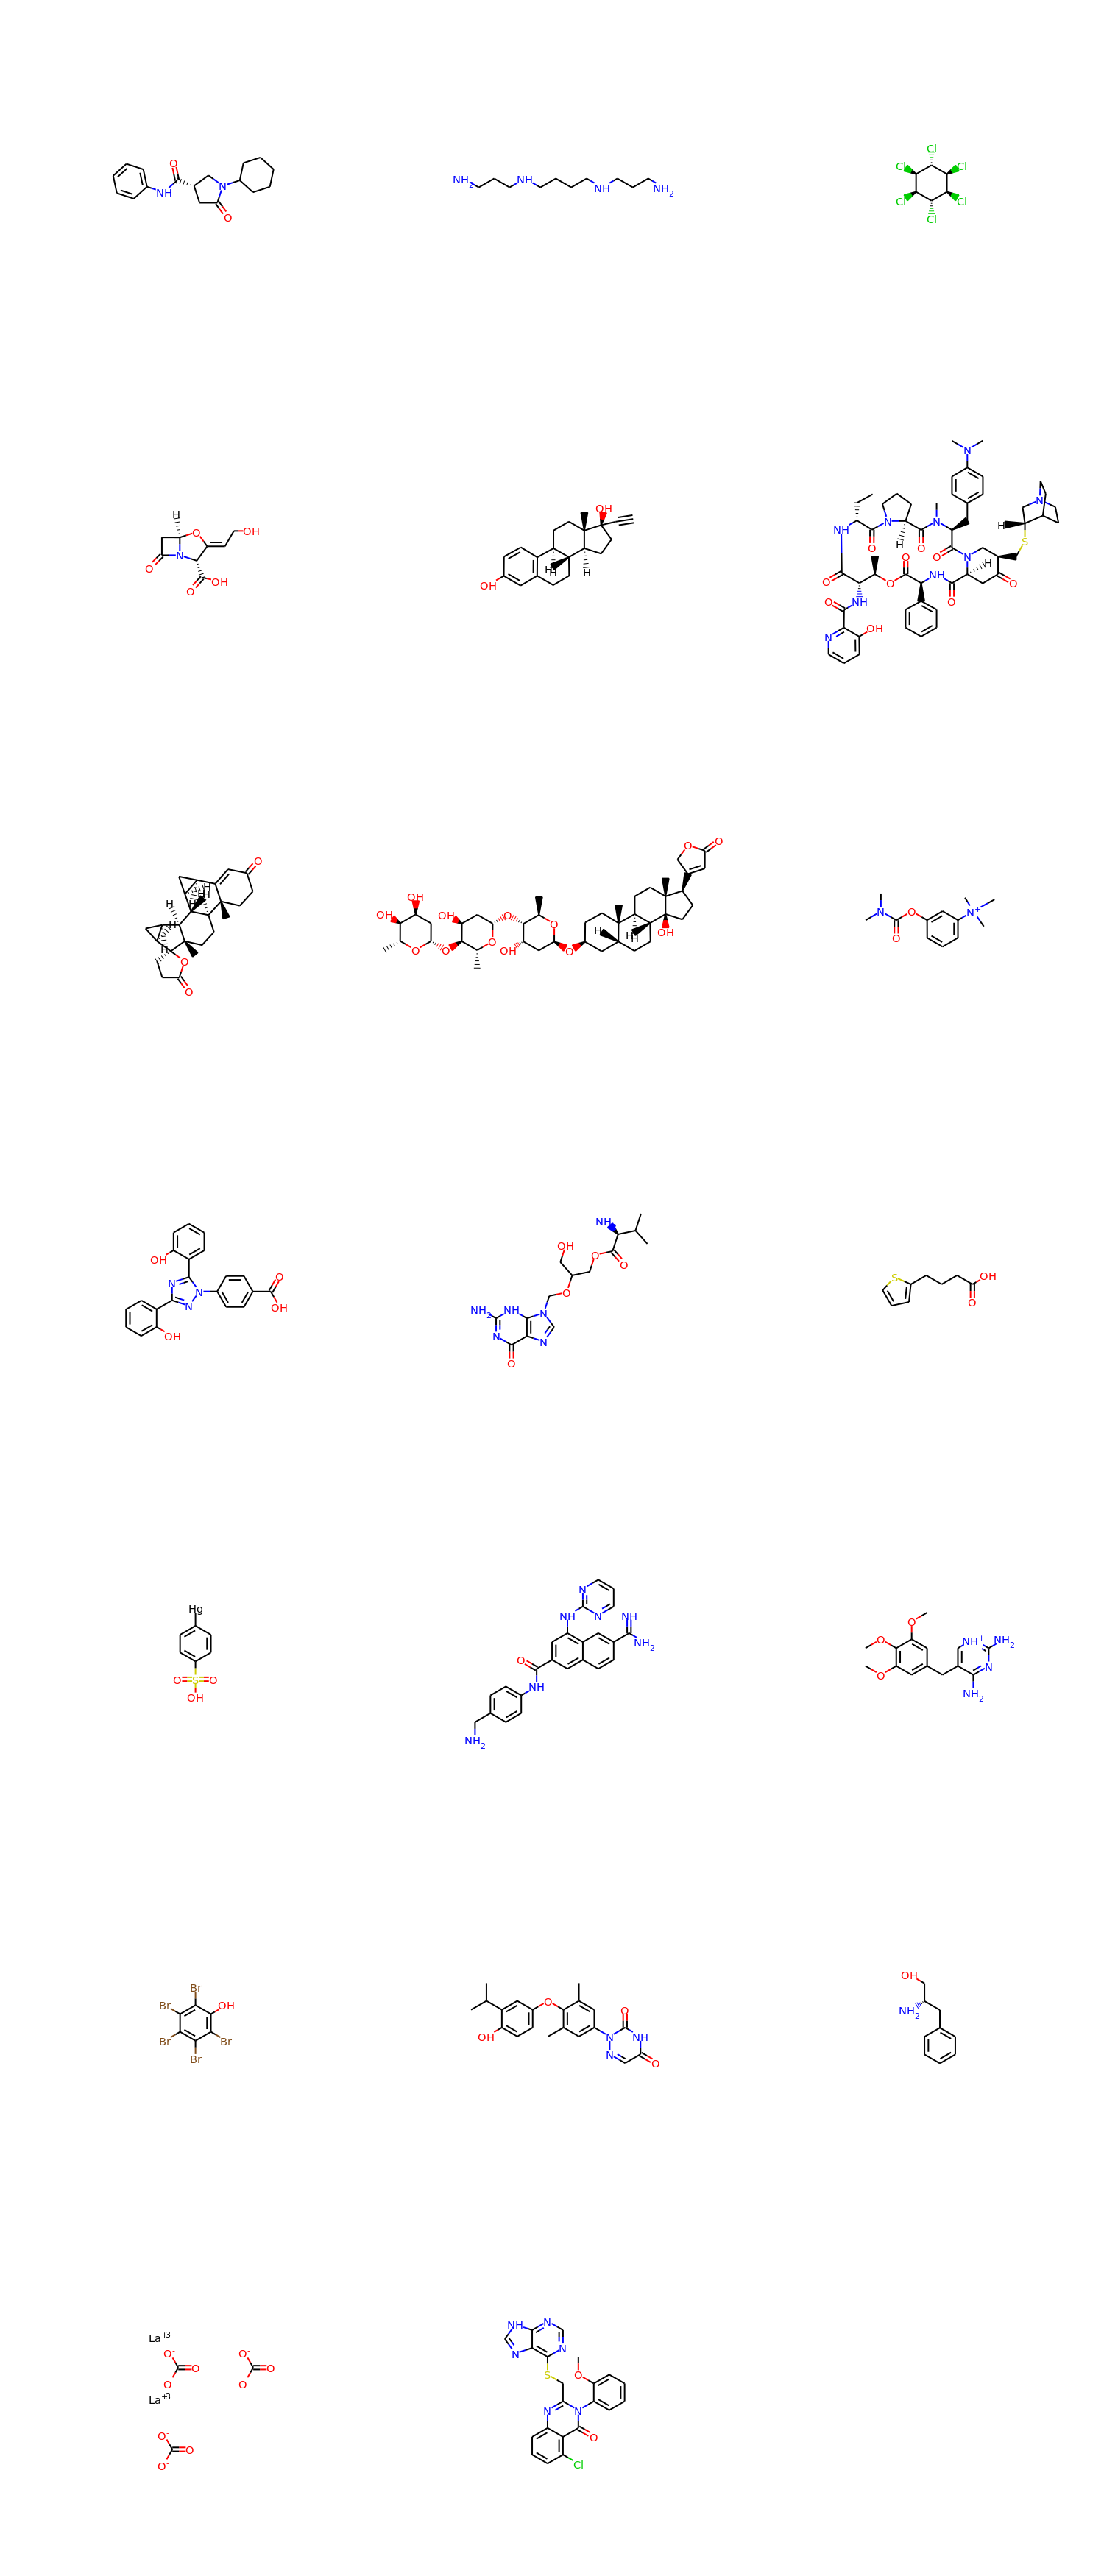

In [110]:
Draw.MolsToGridImage(organic_picked_molecules, molsPerRow=3, 
                      subImgSize=(500, 500))